<a href="https://colab.research.google.com/github/AdriSuarez05/diplomado_python/blob/main/NN_clasificaci%C3%B3n_curso_PAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos las librerias
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised = True, with_info=True )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteYBLXZL/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteYBLXZL/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [5]:
#Separar base de datos o dataset en train y test
datos_entrenamiento, datos_prueba = datos['train'], datos['test']

In [6]:
#Separamos los nombres o labels de las categorias
nombres_clases = metadatos.features['label'].names

In [7]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
# Hacer el preprocesamiento de los datos, es decir, hacer que todos los datos sean iguales
# Normalizamos o colocamos los datos iguales (pixeles de 0-255 a pixeles de 0-1)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Pasamos las imagenes de 255 a 0 y 1
  return imagenes, etiquetas

# normalizar los datos de entrenamiento y prueba con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_prueba = datos_prueba.map(normalizar)

# Agregar cache a los datos para que se guarde en disco duro y en la ram
datos_entrenamiento = datos_entrenamiento.cache()
datos_prueba = datos_prueba.cache()


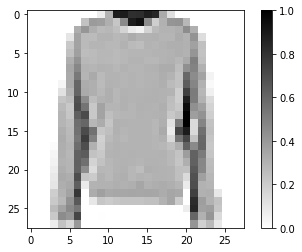

In [17]:
# Mostrar una imagen de los datos de prueba. Solo se tomara la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

imagen = imagen.numpy().reshape((28, 28))

# Mostramos la imagen
plt.figure()
plt.imshow(imagen, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

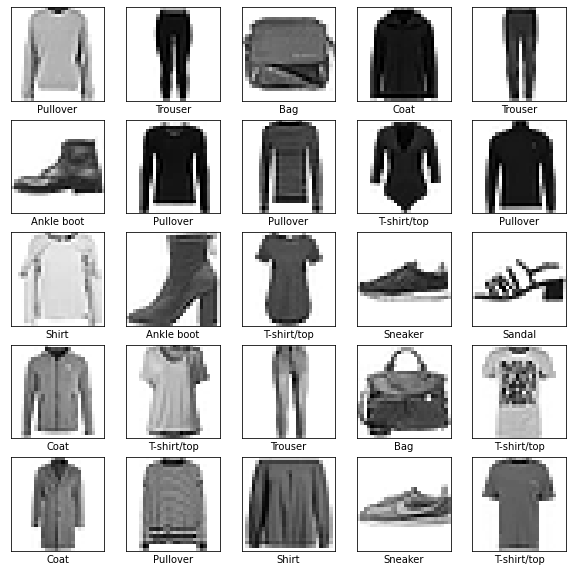

In [18]:
# Mostramos 25 datos o imagenes de los datos de prueba
plt.figure(figsize=(10, 10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28, 28))

  #Dibujamos las 25 imagenes
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [3]:
#Creacion del modelo
modelo = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #Flatten crea automaticamente 784 neuronas de entrada que toma de los datos
                              tf.keras.layers.Dense(50, activation=tf.nn.relu),
                              tf.keras.layers.Dense(50, activation=tf.nn.relu),
                              tf.keras.layers.Dense(10, activation=tf.nn.softmax)
 ])

In [4]:
from tensorflow.python.eager.monitoring import Metric

#entrenamiento o compilacion del modelo
modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

num_datos_entrenamiento = metadatos.splits['train'].num_examples
num_datos_prueba = metadatos.splits['test'].num_examples

print(num_datos_entrenamiento)
print(num_datos_prueba)

NameError: ignored

In [ ]:
#Partimos por lotes o pedacitos los dtos del entrenamiento
tamaño_lote = 32

datos_entrenamiento =  datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(tamaño_lote)
datos_prueba = datos_prueba.batch(tamaño_lote)

import math

historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_datos_entrenamiento/tamaño_lote))

Epoch 1/5


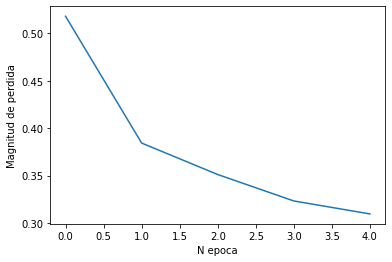

In [23]:
#Graficamos el error del entrenamiento
plt.xlabel("N epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

Prediccion: Sneaker


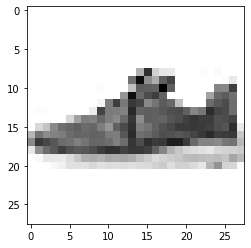

In [31]:
from functools import cmp_to_key
#Recorrer las imagenes
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_prueba.take(20):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()

  prediccion = modelo.predict(imagenes_prueba)
  #print(etiquetas_prueba)

imagen = imagenes_prueba[19]
imagen = np.array([imagen])

prediccion = modelo.predict(imagen)

imagen = imagen.reshape((28, 28))
plt.imshow(imagen, cmap=plt.cm.binary)
print("Prediccion: " +nombres_clases[np.argmax(prediccion[0])])